# **Business Problem Understanding**

## **Context**

A survey was conducted in the United States of America  (USA), specifically at California (CA) states on 1990's. originally the data set were featured in papper proposed by Pace, R. Kelley, and Ronald Barry. "Sparse spatial autoregressions." Statistics & Probability Letters 33.3 (1997): 291-297.

With the data given we would like to proposed a featured model of machine learning to gain prediction using regression method and achieve the prediction of median house value from all accross **CA states**.

## **Problem Statement**

**Real Estate Company** was still implementing **conventional** methods such as, **Price per Square Foot or Square Meters of its property**, **Comparative Market Analysis (CMA)**, **Appraisal** and **Income Approach**.

Which is have several disadvantages such as resource heavy of manpower, poor generalization (specific to certain circumstances) as it is based on actual market data and similar properties in the area, inneficient not having immediate result.

The majority of hurdle that were facing by potential buyer was whether when they were going to rent or buy a property. they tend to scrounging, and try to compare by themselves which also time consuming. 



## **Goals**

Determining the **median house value** with the features of variables within our data sets, which can help to speed up the process by using Machine Learning Algorithm Model. 

Projected to be an Automated Tools (AVM's) for professional appraisals are commonly used for convenience and accuracy in assessing the value of a property.

# **Analytical Approach**

The analytical approach will focus on leveraging data to predict property prices based on a variety of features it has. this approacch uses advanced techniques that can capture complex relationship between features and our target (median property value) or price.

The machine learning model would have several key steps as follows;

1. Data Collection
2. Data Preprocessing
3. Feature Selection and Engineering
4. Model Selection
5. Model Training
6. Model Evaluation
7. Model Tuning
8. Model Deployment
9. Interpretability and Insights

# **Metric Evaluation**

After training our model's performance will be evaluated using appropriate regression metrics to asses how well it predicts property values. herewith the most common evaluation metrics that we can apply:

1. Mean Absolute Error (MAE) it measures the average absolute difference between predicted and actual property prices.

2. Root Mean Squared Error (RMSE): Gives a higher penalty to large errors and sensitive to outliers

3. Mean Absolute Percentage Error (MAPE): Measures the average absolute percentage difference between predicted and actual prices, which is useful to evaluating relative performance

4. R-Squared (R^2): indicates how well the model fits the data (the proportion of variance explained by the model)

in regression model, in order to find out the accuracy of an algorithm model, we can take from the value that has a small error. In other words, the smaller the error value produced, the closer the value or distance between the actual value and the predicted value.

# **Data Understanding**

# **Information About Dataset**

1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

## **Import Libraries**

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# test split
from sklearn.model_selection import train_test_split

# library missing value
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

# Encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder, BinaryEncoder

# preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Cross Validation
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
from sklearn.svm import SVR


# Hyperparam Tuning
from sklearn.model_selection import RandomizedSearchCV, KFold, GridSearchCV

import warnings
warnings.filterwarnings('ignore')

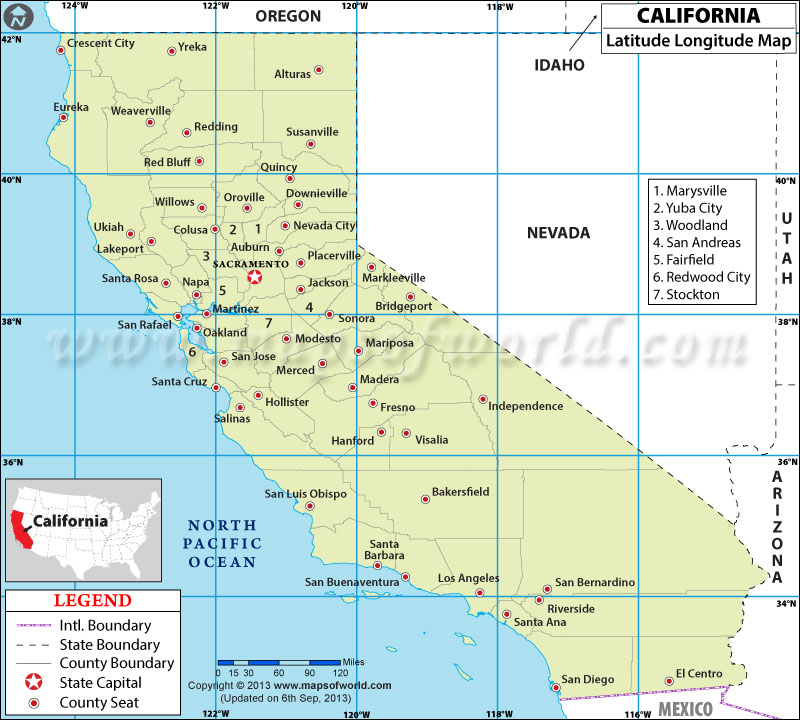

# **1. Load Dataset**

In [2]:
df = pd.read_csv('data_california_house.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


In [3]:
df['total_bedrooms'].value_counts()

total_bedrooms
331.0     39
348.0     38
289.0     38
426.0     36
312.0     36
          ..
2595.0     1
1712.0     1
1384.0     1
2062.0     1
2387.0     1
Name: count, Length: 1748, dtype: int64

# **Data Preprocessing**

The data consist of various information related to the property location, characteristics. However we also can check the information and do data cleaning, then execute exploratory data analysis.:
1. missing vallue checking, duplicated items, data type, incorrect typing, data standardization value.
2. using visualization to gather any outlier that exist in our dataset



## **General Information and Data Types**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [5]:
df.shape

(14448, 10)

## **Check Missing Value in Dataset**

In [6]:
check_null = df.isna().sum()
number_of_null = pd.concat([check_null,check_null/len(df)*100],axis=1,keys=['Null Qty','Null in %'])
number_of_null

,Null Qty,Null in %
longitude,0,0.000000
latitude,0,0.000000
housing_median_age,0,0.000000
total_rooms,0,0.000000
total_bedrooms,137,0.948228
population,0,0.000000
households,0,0.000000
median_income,0,0.000000
ocean_proximity,0,0.000000
median_house_value,0,0.000000


since the total null only below < 1% for our machine learning model we will not include these, hence will be removed.

In [7]:
df.dropna(subset=['total_bedrooms'], axis= 0, inplace=True)

## **Check Duplicated Items**

In [8]:
df.duplicated().sum()

0

Descriptive statistics can be applied to our model to have brief overview and summarize regarding our features or variables. from this perspective we also can inspect whether there are any irregular data. such as minimum, maximum value and even the mean of the data

In [9]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000
mean,-119.567150,35.631365,28.609671,2640.917686,538.260709,1424.772273,499.480470,3.866774,206793.156942
std,2.006374,2.139589,12.606493,2197.192896,423.577544,1151.795857,383.826005,1.890866,115404.371629
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1452.000000,295.000000,784.000000,279.000000,2.569400,119400.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1164.000000,410.000000,3.540300,180000.000000
75%,-118.000000,37.715000,37.000000,3142.000000,647.000000,1722.000000,603.500000,4.736100,263750.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


standardization of `median_income`, as we can see the value of can be converted to tent'h of thousands

## Checking Unique Value in Each Variables

In [10]:
listItem = []

for col in df.columns:
    listItem.append([col, df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

df_model_desc = pd.DataFrame(columns=['Column Name', 'Unique Qty', 'Sample of Unique'], data=listItem)
df_model_desc

,Column Name,Unique Qty,Sample of Unique
0,longitude,806,"[-122.38, -120.72]"
1,latitude,835,"[39.51, 40.25]"
2,housing_median_age,52,"[52.0, 48.0]"
3,total_rooms,5213,"[3328.0, 1723.0]"
4,total_bedrooms,1748,"[246.0, 410.0]"
5,population,3491,"[1593.0, 1122.0]"
6,households,1646,"[547.0, 964.0]"
7,median_income,9726,"[5.2837, 4.4583]"
8,ocean_proximity,5,"[<1H OCEAN, INLAND]"
9,median_house_value,3540,"[441700.0, 50600.0]"


## **Standardization of `Median_Income`**

In [11]:
df['median_income'] = df['median_income']*10000

## **EDA (Exploratory Data Analysis)**

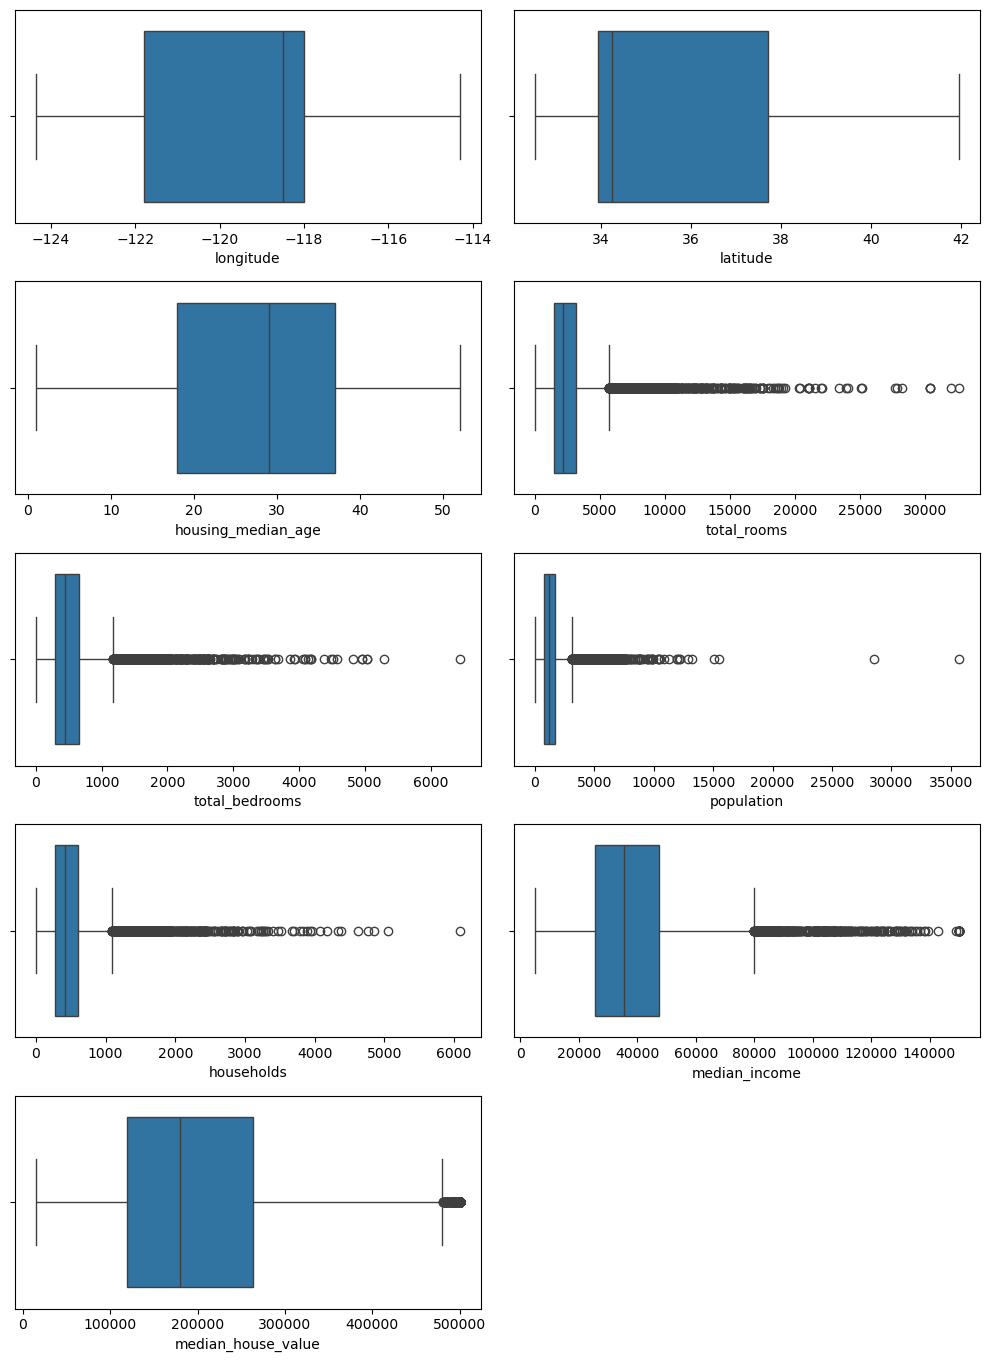

In [12]:
plt.figure(figsize=(10,16))
pltnum = 1
# filter columns that are numeric 
num_cols = df.select_dtypes(include=['int', 'float']).columns

for column in num_cols:
    plt.subplot(6,2,pltnum)
    sns.boxplot(data=df, x=column)
    pltnum += 1
    
plt.tight_layout()
plt.show()

## **Ilustration of House price vs Ocean proximity**

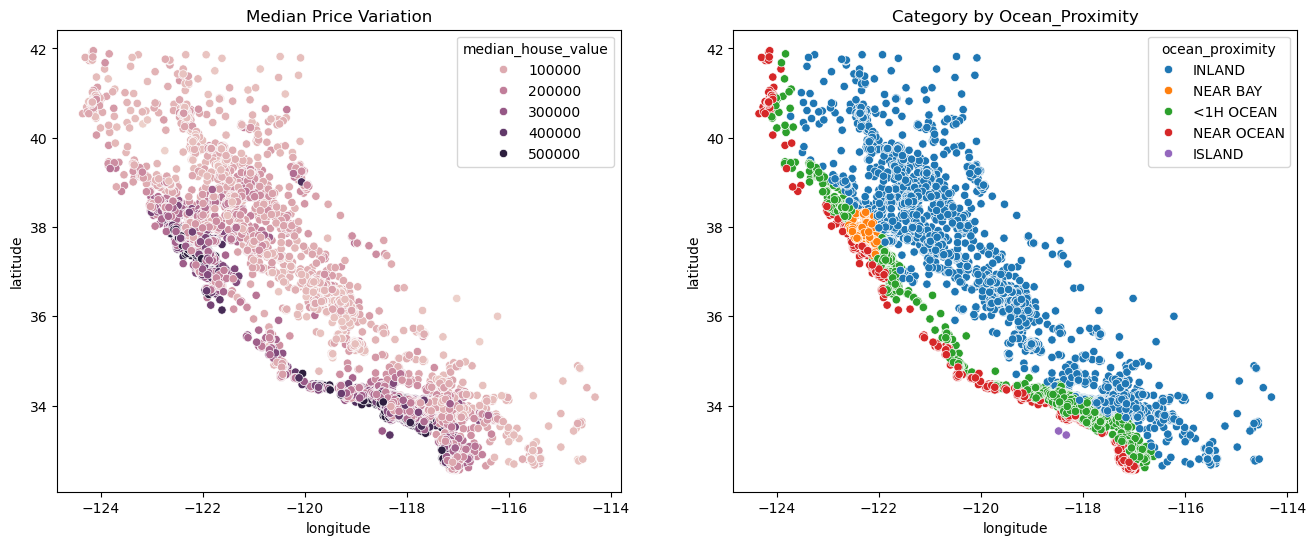

In [13]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
sns.boxplot(scatter_plot = sns.scatterplot(x='longitude', y='latitude', hue='median_house_value', sizes=(20, 200), data=df))
plt.title('Median Price Variation')

plt.subplot(1,2,2)
scatter_plot = sns.scatterplot(x='longitude', y='latitude', hue='ocean_proximity', sizes=(20, 200), data=df)
plt.title('Category by Ocean_Proximity')


plt.show()

From the longitude and latitude, we can get figure above that indicates the spread of Near Ocean house were preferably more expensive than the others, meanwhile the INLAND type were spread wider acrross california, indicated with lower median house value  

# **Feature Engineering & Selection**

Feature engineering involves creating new features or selecting the most relevant ones to improve model performance such as: 

1. Correlation of each variables
2. Determine Feature Selection Filters


## **Correlation of each variables**

<Axes: >

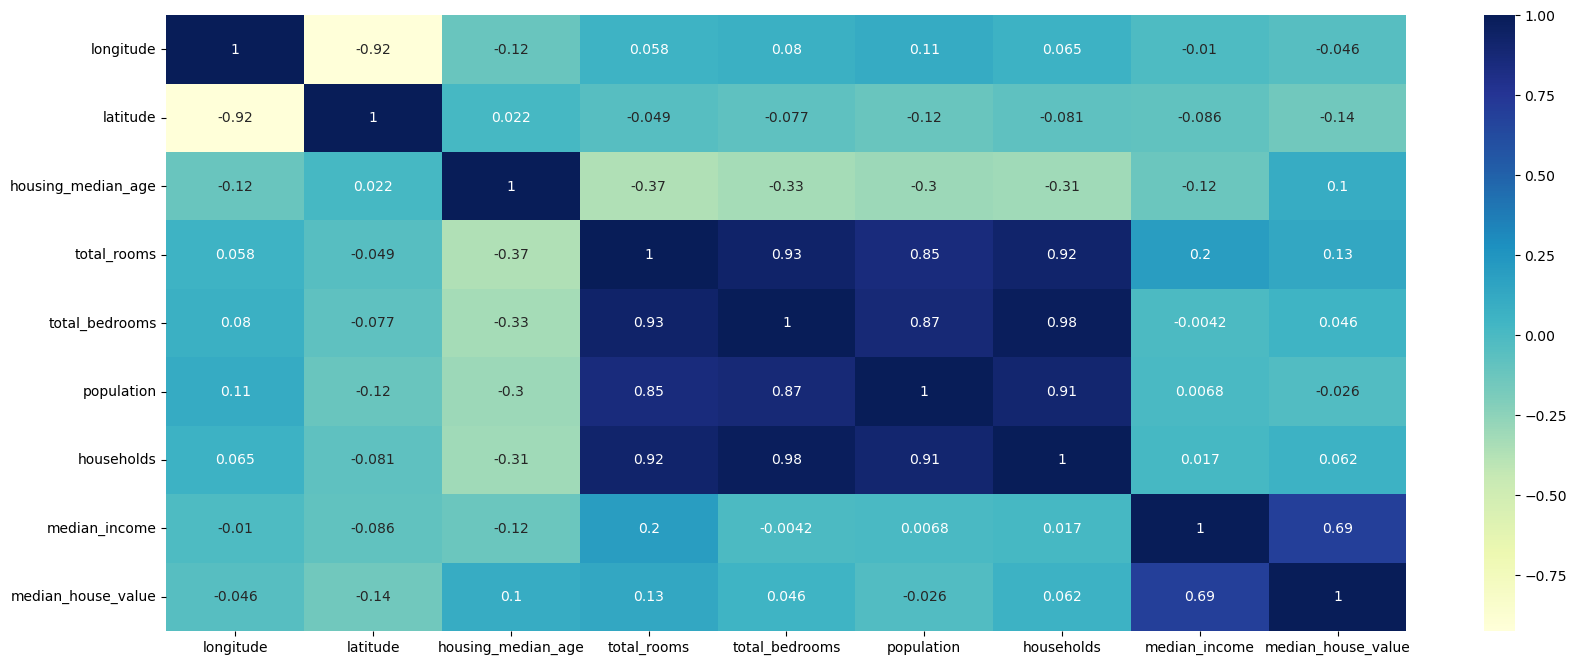

In [14]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='YlGnBu')

In [15]:
corr_median_house_value = df.corr(numeric_only=True)
corr_median_house_value['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.693554
total_rooms           0.131728
housing_median_age    0.103812
households            0.061510
total_bedrooms        0.045915
population           -0.025988
longitude            -0.045500
latitude             -0.144499
Name: median_house_value, dtype: float64

from the correlation value, it is shown that the house value or house price is highly correlated with the median income, which is totaly conforms where **the 'rich' people live is tend to be more expensive than others**. however as we move up the latitude tend to be cheaper in the southern of california, this is represent by the weak correlation even negative on `longitute` and `latitude` 

## **Determine Feature Selection**

In [16]:
# Create function to finding any data anomalies
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    lower_bound = q1 - limit
    upper_bound = q3 + limit
    print(f'lower_bound: {lower_bound}')
    print(f'upper_bound: {upper_bound}')        

we will try to find the best way handling outlier priority based on the correlation we have found, herewith:
1. median income
2. median house value
3. median house age

### **Median Income**

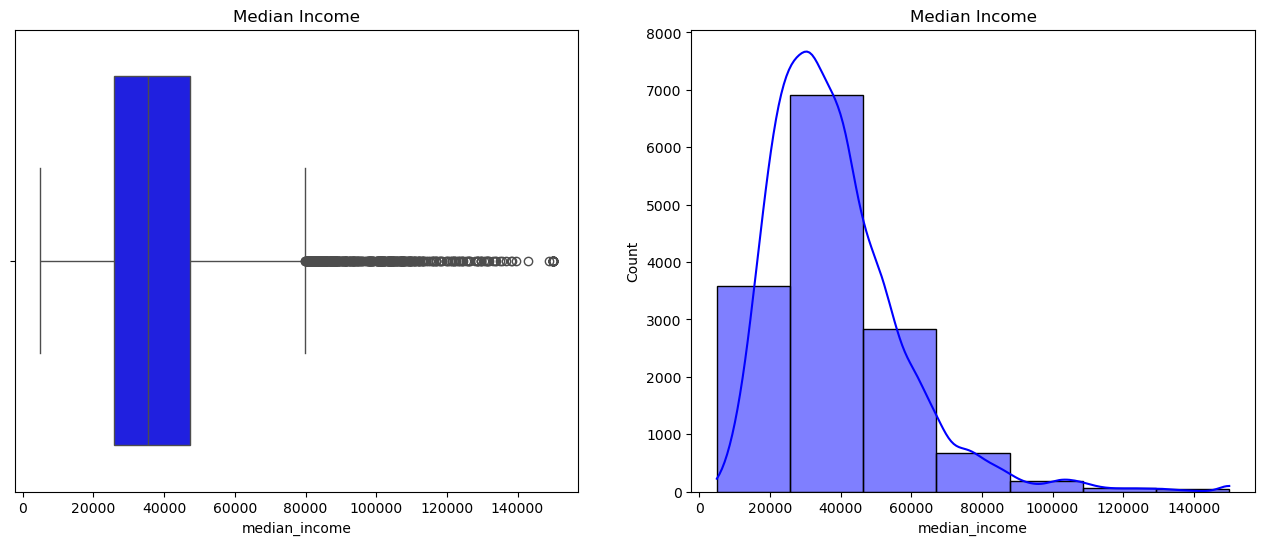

In [17]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
sns.boxplot(x= df['median_income'],color='blue')
plt.title('Median Income')

plt.subplot(1,2,2)
sns.histplot(df['median_income'],binwidth=20000,kde=True,color='blue')
plt.title('Median Income')


plt.show()

the spread of median income is quite present, shown by the graph above. we will focus our model to data bellow upperbound with non outliers

In [18]:
print(f'Herewith value for feature/ variable for {'median_income'}')
find_anomalies(df['median_income'].round(2))

Herewith value for feature/ variable for median_income
IQR: 21667.0
lower_bound: -6806.5
upper_bound: 79861.5


In [19]:
df['median_income'].describe().round(2)

count     14311.00
mean      38667.74
std       18908.66
min        4999.00
25%       25694.00
50%       35403.00
75%       47361.00
max      150001.00
Name: median_income, dtype: float64

In [20]:
df[df['median_income']>79861.5]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
6,-117.80,33.81,14.0,1206.0,142.0,572.0,149.0,88470.0,<1H OCEAN,388700.0
8,-117.65,33.48,6.0,1638.0,188.0,572.0,174.0,130502.0,<1H OCEAN,500001.0
43,-122.21,37.37,34.0,1476.0,217.0,613.0,223.0,82883.0,NEAR OCEAN,500001.0
73,-121.99,37.26,17.0,4034.0,611.0,1158.0,560.0,82069.0,<1H OCEAN,442500.0
124,-121.89,37.23,20.0,7754.0,976.0,3094.0,941.0,81900.0,<1H OCEAN,361600.0
...,...,...,...,...,...,...,...,...,...,...
14298,-118.54,34.26,23.0,4960.0,592.0,1929.0,586.0,109052.0,<1H OCEAN,500001.0
14306,-118.18,34.16,34.0,5012.0,746.0,1699.0,715.0,94987.0,<1H OCEAN,500001.0
14314,-118.01,33.69,3.0,945.0,115.0,337.0,123.0,115199.0,<1H OCEAN,500001.0
14346,-117.66,34.12,22.0,2272.0,278.0,933.0,305.0,88204.0,INLAND,390500.0


there were 477 units of property with median income more than 79861.5 USD, in which we will not include to our model

In [21]:
selected_median_income = 79861.5

percentage_expesnive_house = round(len(df[df['median_income']>selected_median_income])/len(df['median_income'])*100,2) 

print(f'the percentage of median income above $ {selected_median_income} is {percentage_expesnive_house} %')

the percentage of median income above $ 79861.5 is 3.33 %


In [22]:
df = df[df['median_income']<79861.5]
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,19750.0,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,22604.0,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,62990.0,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,17199.0,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,22206.0,INLAND,59200.0
...,...,...,...,...,...,...,...,...,...,...
14442,-120.06,36.94,19.0,901.0,183.0,700.0,190.0,22375.0,INLAND,64300.0
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,44125.0,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,29135.0,INLAND,159400.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,56315.0,<1H OCEAN,484600.0


### **Median House Value**

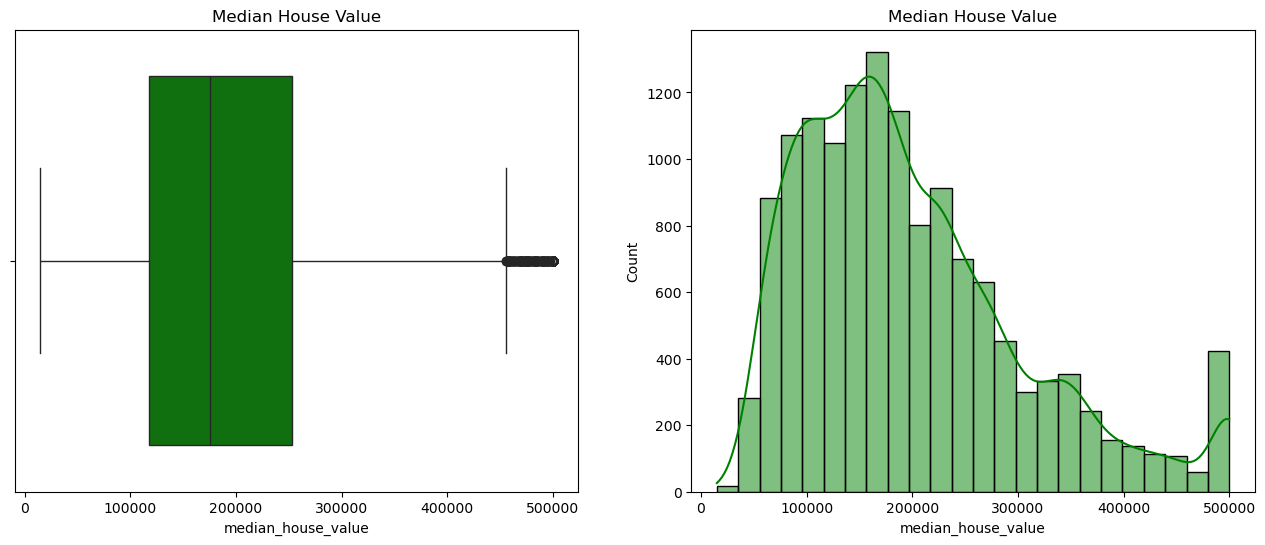

In [23]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
sns.boxplot(x= df['median_house_value'],color='green')
plt.title('Median House Value')

plt.subplot(1,2,2)
sns.histplot(df['median_house_value'],binwidth=20000,kde=True,color='green')
plt.title('Median House Value')


plt.show()

As we can see the median house value ranging mostly at $ 120.000 ~ 270.000, and it is clearly not normaly distributed, shown by right skewed. however there are quite a lot outliers as follow

In [24]:
print(f'Herewith value for feature/ variable for {'median_house_value'}')
find_anomalies(df['median_house_value'])

Herewith value for feature/ variable for median_house_value
IQR: 135350.0
lower_bound: -85600.0
upper_bound: 455800.0


In [25]:
df['median_house_value'].describe().round(2)

count     13834.00
mean     197878.81
std      106137.33
min       14999.00
25%      117425.00
50%      175400.00
75%      252775.00
max      500001.00
Name: median_house_value, dtype: float64

there descriptiptive statistic shown the value proposition of median_house_value were 75% of it were below USD 252.775, however we will have the upperbound from our previous calculation as much as USD 455.800 to be the baseline as it represent more majority entity for our machine learning model

In [26]:
len(df[df['median_house_value']>455800.0])

503

In [27]:
selected_house_median_value = 455800.0

percentage_expesnive_house = round(len(df[df['median_house_value']>selected_house_median_value])/len(df['median_house_value'])*100,2) 

print(f'the percentage of expensive house above $ {selected_house_median_value} is {percentage_expesnive_house} % and have {len(df[df['median_house_value']>455800.0])} units')

the percentage of expensive house above $ 455800.0 is 3.64 % and have 503 units


### **Median House Age**

In [28]:
df['housing_median_age'].describe().round(2)

count    13834.00
mean        28.63
std         12.56
min          1.00
25%         18.00
50%         29.00
75%         37.00
max         52.00
Name: housing_median_age, dtype: float64

To have clear insight we can combine these descriptive statistics with visualization using boxplot and histplot to get better understanding the spread of housing median age, as below;

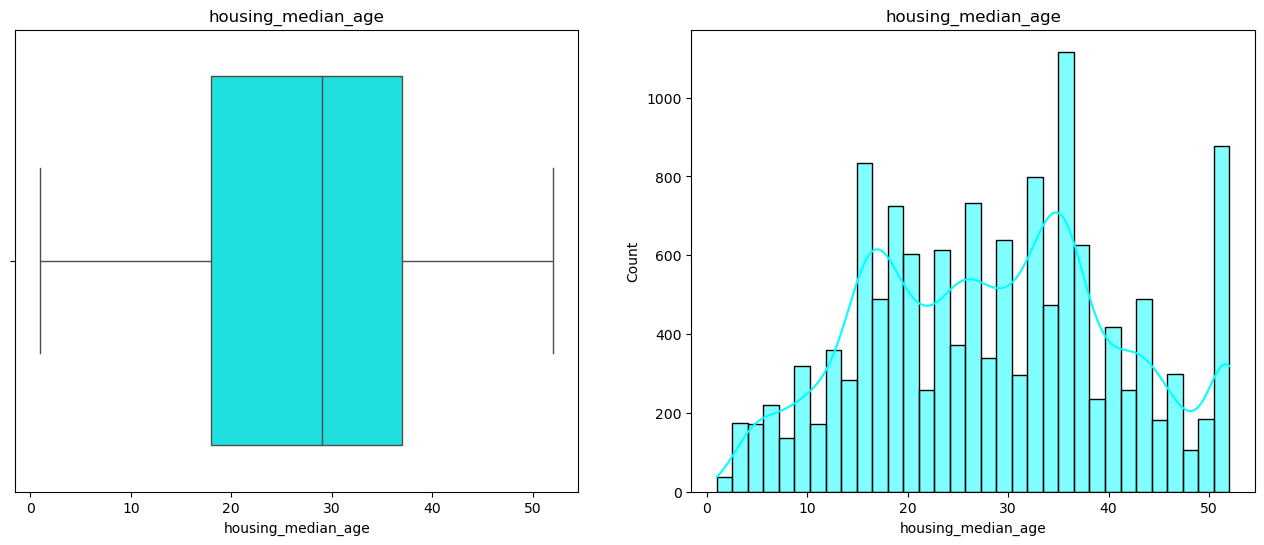

In [29]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
sns.boxplot(x= df['housing_median_age'],color='cyan')
plt.title('housing_median_age')

plt.subplot(1,2,2)
sns.histplot(df['housing_median_age'],kde=True,color='cyan')
plt.title('housing_median_age')


plt.show()

With the average housing_median_age is 29 years. and the 75% property were below 38 years, which 38 and 50 years were the most apparent. 

In [30]:
seleceted_property = 50

total_property_selected = len(df[df['housing_median_age']>seleceted_property])

total_property_percentage = round(total_property_selected/len(df)*100,2)

print(f'The housing median age: {seleceted_property} years, in total of {total_property_selected} units, contribute {total_property_percentage} % all across data' )

The housing median age: 50 years, in total of 877 units, contribute 6.34 % all across data


## **Feature Selection Adjustment**

As previously shown above, we would like to limit the number of data that will be calculate by our machine learning model. Consideration were focus to the specific data in order to gain the characteristic for the majority data set based on median_house_value. while we have bracket for max upper bound of the median house value 455800. for our approach we will set to 453512.5 still bellow from the max upper bound.



In [31]:
df = df[df['median_house_value']<453512.5]
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,19750.0,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,22604.0,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,62990.0,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,17199.0,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,22206.0,INLAND,59200.0
...,...,...,...,...,...,...,...,...,...,...
14441,-117.10,32.73,24.0,2927.0,704.0,2005.0,668.0,22375.0,NEAR OCEAN,102900.0
14442,-120.06,36.94,19.0,901.0,183.0,700.0,190.0,22375.0,INLAND,64300.0
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,44125.0,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,29135.0,INLAND,159400.0


## **Ocean Proximity**

these columns contain the number of property refer its location at the california state, however we found there are ISLAND category which only 2, this can be eliminated since the it is not sufficient to be included in the process of  train, validation, and testing to our machine learning model. 

In [32]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     5757
INLAND        4498
NEAR OCEAN    1660
NEAR BAY      1409
ISLAND           2
Name: count, dtype: int64

In [33]:
df.drop(df[df['ocean_proximity'] == 'ISLAND'].index, inplace=True)

In [34]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,19750.0,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,22604.0,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,62990.0,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,17199.0,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,22206.0,INLAND,59200.0


In [35]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     5757
INLAND        4498
NEAR OCEAN    1660
NEAR BAY      1409
Name: count, dtype: int64

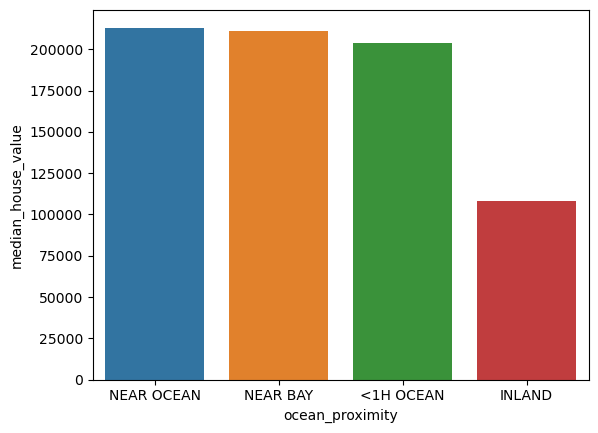

In [36]:
df_ocean_median = df.groupby('ocean_proximity')['median_house_value'].median().sort_values(ascending=False).reset_index()
sns.barplot(df_ocean_median, x='ocean_proximity', y='median_house_value', hue='ocean_proximity')

plt.show()

According to analysis by ocean_proximity, the house in the NEAR BAY and NEAR ocean are quite similar in terms of median_house_value, followed by 1H OCEAN or 1 hour to ocean and INLAND.


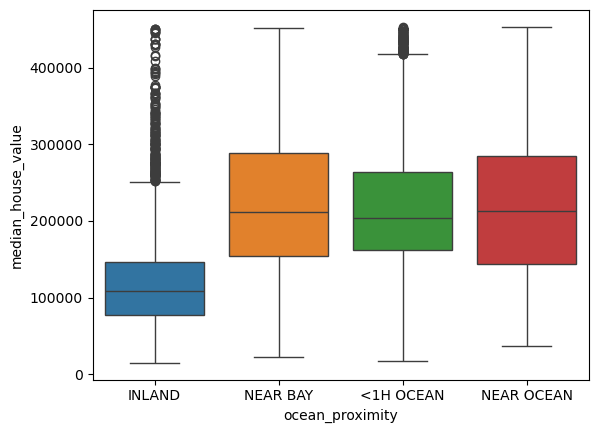

In [37]:
sns.boxplot(df, x='ocean_proximity', y='median_house_value', hue='ocean_proximity')

plt.show()

The property which located in category of <1H OCEAN> were approximately have 5859 units and following by INLAND with 4558 units, have most significant **outliers** these showns that the property characteristics were **varies** not only depends on its location. but several factors such as number of rooms, property age. 

while the other two (Near Bay & Near Ocean) have quite homogenous data with no outlier.

# **MODELING**

before we implement machine learning model, various regression models such as:

1. Linear Regression
2. Decision Tree
3. Random Forest 
4. Gradient Boosting(XGBoost)

## **Dataset Splitting**

- Define X and y
- Splitting

In [38]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [39]:
X = df.drop(columns='median_house_value')
y = df['median_house_value']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0
    )

## Data Transformation

**Pipeline**

- Create ordinal transformer for ocean_proximity

## Encoding

1. Encoding:
    - ordinal: 'ocean_proximity'

2. Scaling 
    - robustscaler: 'longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'

3. pipeline 

In [41]:
mapper = [{
    'col' : 'ocean_proximity',
    'mapping': {'NEAR BAY': 1,
                'NEAR OCEAN': 2,
                '1HR OCEAN' :3,
                'INLAND': 4}
}]

this mapper were supposed to rank the ordinal manners of ocean proximity based on our observation and related to median value of property in respectible proximity area

In [42]:
pipeline_ordinal_robust = Pipeline([
    ('ordinal', OrdinalEncoder(mapping = mapper)),
    ('robust', RobustScaler())
])

In [43]:
transformer = ColumnTransformer([
    ("pipe_ordinal_robust", pipeline_ordinal_robust, ['ocean_proximity'])
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipe_ordinal_robust',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'ocean_proximity',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': NEAR BAY      1
NEAR OCEAN    2
1HR OCEAN     3
INLAND        4
dtype: int64}])),
                                                 ('robust', RobustScaler())]),
                                 ['ocean_proximity'])])

In [44]:
# fitting
transformer.fit(X_train)

# transform
X_train_prep = transformer.transform(X_train)
X_test_prep = transformer.transform(X_test)

# **Cross validation**

Cross Validation was conducted to avoid overfitting and ensure that the model generalizes well to unseen data

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

# define Algo

lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=0)
rf = RandomForestRegressor(random_state=0)
xgb = XGBRegressor(random_state=0,objective ='reg:squarederror')

In [46]:
# Original

list_model = [lr, knn, dt, rf, xgb]
scorer = ['neg_mean_absolute_percentage_error','neg_root_mean_squared_error','neg_mean_absolute_error']

list_mean_mape = []
list_std_mape = []

list_mean_rmse = []
list_std_rmse = []

list_mean_mae = []
list_std_mae = []


for model_name in list_model:    
    # define
    model = model_name

    # pipeline model
    pipe_model = Pipeline([
        ('preprocessing', transformer),
        ('model', model)
    ])

    cv_score = cross_validate(
        estimator=pipe_model,
        X = X_train,
        y = y_train,
        cv = 5,
        scoring = scorer
    )
    
    list_mean_rmse.append(cv_score['test_neg_root_mean_squared_error'].mean())
    list_std_rmse.append(cv_score['test_neg_root_mean_squared_error'].std())

    list_mean_mape.append(cv_score['test_neg_mean_absolute_percentage_error'].mean())
    list_std_mape.append(cv_score['test_neg_mean_absolute_percentage_error'].std())

    list_mean_mae.append(cv_score['test_neg_mean_absolute_error'].mean())
    list_std_mae.append(cv_score['test_neg_mean_absolute_error'].std())

In [47]:
df_cv = pd.DataFrame()
df_cv['Model'] = ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor']

df_cv['mean_Mape'] = list_mean_mape
df_cv['std_Mape'] = list_std_mape

df_cv['mean_Rmse'] = list_mean_rmse
df_cv['std_Rmse'] = list_std_rmse

df_cv['mean_Mae'] = list_mean_mae
df_cv['std_Mae'] = list_std_mae

df_cv = df_cv.sort_values(['mean_Mape','mean_Rmse','mean_Mae'], ascending=False)
df_cv

,Model,mean_Mape,std_Mape,mean_Rmse,std_Rmse,mean_Mae,std_Mae
4,XGBoost Regressor,-0.179516,0.006680,-43122.209933,1161.494273,-29454.335213,715.672463
3,RandomForest Regressor,-0.186861,0.005887,-44559.009013,755.252091,-30558.883673,433.000084
2,DecisionTree Regressor,-0.250766,0.010476,-62111.409848,1303.839315,-42090.546408,947.391077
0,Linear Regression,-0.278326,0.008813,-58184.538699,1074.935808,-43497.041230,553.691801
1,KNN Regressor,-0.359768,0.007006,-72597.903860,1391.151656,-54983.983178,893.031041


In terms of MAPE, the XGBoost regressor remain the best with lower value, however the lower standard RMSE the random forest shown better value. 

In [48]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [49]:
# comparison of two best models
models = {
    'XGB': XGBRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1)
}

score_rmse = []
score_mae = []
score_mape = []

# predict to test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

# Round the scores to 2 decimals
score_before_tuning = pd.DataFrame({
    'RMSE': [round(val, 2) for val in score_rmse],
    'MAE': [round(val, 2) for val in score_mae],
    'MAPE': [round(val, 4) for val in score_mape]
}, index=models.keys())

# Display the scores with rounded values
print('Initial Score')
score_before_tuning


Initial Score


,RMSE,MAE,MAPE
XGB,41482.32,28642.96,0.1674
RandomForest,42323.12,29130.41,0.1689


## **Best Model Possibility**

- model which have lowest value or even **approaching zero** (Mean MAPE, mean RMSE dan mean MAE) and,
- model the most stable with lowest std is **XGBoostregressor**

# **Model Tuning**

To Improve model performance, **Hyperparameter tuning** is performed. This involves optimizing the parameters of the machine learning algorithm to achieve better performance

## **Hyperparameter Tuning**

In [50]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [51]:
from xgboost.sklearn import XGBRegressor

In [52]:
# The maximum depth of the trees. Larger values can lead to overfitting.
max_depth = list(np.arange(1, 11))

# Learning rate is The step size shrinkage to prevent overfitting by scaling the weight of new trees.
learning_rate = list(np.arange(1, 100)/100)

# number of boosting round of trees to train
n_estimators = list(np.arange(100, 201))

# Fraction of the training data to use for building each tree. 
# A value less than 1.0 will prevent overfitting by introducing randomness.
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
# Minimum loss reduction required to make a further partition. 
# This is used to control overfitting by pruning
gamma = list(np.arange(1, 11)) 

# Fraction of features to be used for building each tree
colsample_bytree = list(np.arange(1, 10)/10)

# L1 regularization term on weights, which helps reduce overfitting
reg_alpha = list(np.logspace(-3, 1, 10)) 


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

there were various hyperparameter to be use, we focused on those aforementioned above such as:
1. max_depth
2. learning_rate
3. n_estimators,
4. subsample,
5. gamma
6. colsample_bytree
7. reg_alpha

These hyperparameters fine-tune a Gradient Boosting Machine (GBM): **max_depth** and **gamma** limit tree complexity; **learning_rate and n_estimators** control the model's learning pace and size; **subsample and colsample_bytree** introduce randomness by using fractions of data and features for each tree; and **reg_alpha** simplifies the model through regularization. Proper tuning of these parameters **prevents overfitting and optimizes performance**.


## **Benchmark Model Parameters**

In [53]:
# benchmark model XGB
xgb = XGBRegressor(random_state=1, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 1600,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', 
    random_state = 1  
)

In [54]:
random_xgb.fit(X_train,y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_ordinal_robust',
                                                                               Pipeline(steps=[('ordinal',
                                                                                                OrdinalEncoder(mapping=[{'col': 'ocean_proximity',
                                                                                                                         'data_type': dtype('O'),
                                                                                                                         'mapping': NEAR BAY      1
NEAR OCEAN    2
1HR OCEAN     3
INLAND        4
dtype: int64}])),
                                                                                               (...
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [55]:
display(pd.DataFrame(random_xgb.cv_results_).sort_values('rank_test_neg_mean_absolute_error'))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
1271,2.882738,0.091173,0.051729,0.001890,0.9,0.001,196,8,0.12,1,...,4.692559e+02,1,-0.169783,-0.168778,-0.173480,-0.166871,-0.186023,-0.172987,0.006864,1
1243,2.047317,0.154176,0.045117,0.005899,0.9,0.464159,167,8,0.11,5,...,4.707436e+02,2,-0.171971,-0.168547,-0.177280,-0.168873,-0.185702,-0.174475,0.006430,3
221,4.161645,0.089405,0.063149,0.004259,0.9,0.059948,137,10,0.04,6,...,4.310731e+02,3,-0.170131,-0.168967,-0.176904,-0.169370,-0.191964,-0.175467,0.008742,6
712,4.306126,0.194075,0.062673,0.003768,0.9,0.002783,160,10,0.11,9,...,4.211899e+02,4,-0.171091,-0.168443,-0.174912,-0.167594,-0.187435,-0.173895,0.007234,2
1351,1.472658,0.037355,0.042619,0.004265,0.8,0.007743,198,6,0.08,6,...,2.420556e+02,5,-0.172819,-0.168548,-0.176308,-0.171442,-0.189515,-0.175726,0.007332,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1538,1.079485,0.057120,0.038888,0.005364,0.2,0.002783,109,9,0.93,2,...,2.332905e+05,1596,-5.656373,-5.548424,-10.983647,-6.542545,-9.623373,-7.670873,2.219137,1596
1449,1.232225,0.035147,0.048787,0.007128,0.2,0.16681,115,10,0.92,1,...,5.050018e+05,1597,-5.911558,-4.235907,-7.155896,-8.363333,-18.502348,-8.833808,5.023896,1597
467,1.090988,0.030219,0.040904,0.005778,0.2,0.021544,177,8,0.92,10,...,4.205656e+05,1598,-15.714615,-6.606249,-14.162008,-12.820928,-11.514964,-12.163753,3.109350,1598
663,1.511110,0.061650,0.057550,0.004739,0.2,0.007743,186,10,0.95,10,...,1.434358e+06,1599,-29.377068,-29.845986,-52.842832,-27.343034,-53.326903,-38.547165,11.900761,1599


In [56]:
random_xgb.best_params_

{'model__subsample': 0.9,
 'model__reg_alpha': 0.46415888336127775,
 'model__n_estimators': 167,
 'model__max_depth': 8,
 'model__learning_rate': 0.11,
 'model__gamma': 5,
 'model__colsample_bytree': 0.7}

In [57]:
# gather prediction in absolute value

random_xgb.best_score_

positive_best_score = abs(random_xgb.best_score_)

round(positive_best_score, 2)


41636.91

# Final Model

In [58]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

## Tuning Accuracy After

In [59]:
random_xgb.best_estimator_ 

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_ordinal_robust',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(mapping=[{'col': 'ocean_proximity',
                                                                                            'data_type': dtype('O'),
                                                                                            'mapping': NEAR BAY      1
NEAR OCEAN    2
1HR OCEAN     3
INLAND        4
dtype: int64}])),
                                                                  ('robust',
                                                                   RobustScaler())]),
                                                  ['ocean_proximity'])])),
                ('model',
                 XGBRegressor(base_...
                              feature_types=None, gamma=5, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.11,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=8, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=167, n_jobs=None,
                              num_parallel_tree=None, random_state=1, ...))])

In [60]:
# model
model = {'XGB': XGBRegressor(random_state=1)}

# define
pipe_best_XGB = random_xgb.best_estimator_


# fitting
pipe_best_XGB.fit(X_train, y_train)

# Predict
y_pred_after = pipe_best_XGB.predict(X_test)

# accuracy

rmse_xgb_after= round(np.sqrt(mean_squared_error(y_test, y_pred_after)), 2)
mae_xgb_after =  round(mean_absolute_error(y_test, y_pred_after), 2)
mape_xgb_after = round(mean_absolute_percentage_error(y_test, y_pred_after),4)

score_after_xgb = pd.DataFrame({'RMSE': rmse_xgb_after, 'MAE': mae_xgb_after, 'MAPE': mape_xgb_after}, index=model.keys())
print('Tuned Score')
score_after_xgb


Tuned Score


,RMSE,MAE,MAPE
XGB,40445.69,27568.58,0.1587


With Random Search N-Iter 1600, this option enable us to gain the randomly selecting hyperparameters and testing them to find an optimal model configuration. shown quite significant reduce on MAPE and lower the value of RMSE and MAE

# **Performance Comparison**

In [61]:
# before
print('Before tuning model')
pd.DataFrame(score_before_tuning.loc['XGB']).T

Before tuning model


,RMSE,MAE,MAPE
XGB,41482.32,28642.96,0.1674


In [62]:
# after
print('after tuning model')
score_after_xgb


after tuning model


,RMSE,MAE,MAPE
XGB,40445.69,27568.58,0.1587


In [63]:
df.shape

(13324, 10)

It can seen from our testing, that the tuning have better result in terms of RMSE, MAE and MAPE respectively. 

the error prediction were lowered by the efforts of hyperparameter tuning. 

RMSE = 41482.32 --> 40445.69 = 1036.63 or equivalent to 2.5 % better after tuning

MAE = 28642.96 --> 27568.58 =  1074.38 or equivalent to 3.75 % better afer tuning

while the model have 15.8% tendency to have false prediction, which were still acceptable and have reasonable in our scenario, surely data utilization were still high from previous 14448 to after cleaning 13324 equivalent to 92.22% data preserved for the model

#### Actual VS Prediction Plot

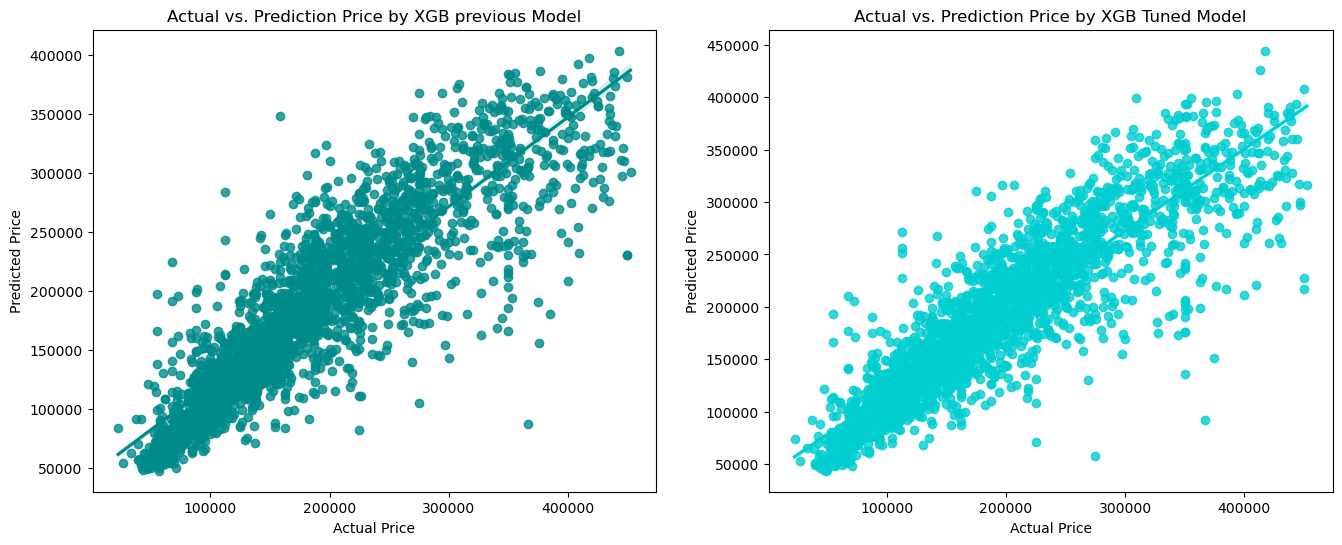

In [64]:
plt.figure(figsize=(16, 6))

plt.subplot(1,2,1)
sns.regplot(x=y_test, y=y_pred,color='darkcyan')
plt.title('Actual vs. Prediction Price by XGB previous Model')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.subplot(1,2,2)
sns.regplot(x=y_test, y=y_pred_after,color='darkturquoise')
plt.title('Actual vs. Prediction Price by XGB Tuned Model')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.show()

The tuned model outperforms the previous model by reducing prediction errors and improving the alignment of predicted prices with actual prices. Although both models show some scatter, the tuned model provides more reliable predictions, particularly for higher-priced properties.


# **Conclusion**

As we have seen XGBoost model with aforementioned hyper tuned parameter

The model built on average, the predicted median house values deviate from the actual values by approximately **$40,445.70**. according to **RMSE**. And the model's predictions are off by around **$27,568.60** according to **MAE**.

A **MAPE** of around 15-20% is generally considered **acceptable** in many forecasting scenario. This with obtained percentage **15.87%,** error margin suggests that the model's predictions could be higher or lower than actual house values.

Thing to keep in mind, and limitation of model built were not considered "The model's accuracy and results **may be influenced by external factors** such as the condition of the actual property, existing furniture, interior design, and other environmental elements. Discrepancies between the model and reality may occur due to these variations."


# **Recommendation**

**Recommendations Based on Model Performance and Limitations:**

**1. Incorporate Additional Features:**
To improve model accuracy, consider integrating more detailed features such as property condition, recent renovations, interior design quality, availability of amenities, and neighborhood-specific factors

**2. Utilize Ensemble Methods or Hybrid Models:**
While XGBoost generally performs well, combining it with other models (e.g., Random Forest, Neural Networks)

**Recommendations Based On Business Perspectives:**

**1. Enhance Data Quality and Collection:**
Ensure that data used for training is up-to-date and accurately reflects the current market. Incorporating real-time or recent property data can help the model adapt to market fluctuations, improving predictive performance.

**2. Collect Feedback from Real-World Use:**
Gather feedback from actual predictions and compare them with real market data to iteratively refine the model. This feedback loop can help improve future iterations.

By implementing these recommendations, the model’s predictive performance can be enhanced, and the impact of external factors that are currently not considered can be minimized


## Save Model

In [65]:
# Save model
import pickle

estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
estimator.fit(X, y)

pickle.dump(estimator, open('Price_Prediction_Test_Data_CA_Housing.sav', 'wb'))